# Enoncé 12 décembre 2017

Correction du premier énoncé de l'examen du 12 décembre 2017. Celui-ci mène à l'implémentation d'un algorithme qui permet de retrouver une fonction $f$ en escalier à partir d'un ensemble de points $(X_i, f(X_i))$.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Q1 - échantillon aléatoire

Générer un ensemble aléatoire de 1000 nombres $(X_i,Y_i)$ qui vérifie :

* $X_i$ suit une loi uniforme sur $[0,16]$
* $Y_i = \mathbb{1}_{[\sqrt{X_i}] \mod 2}$ où $[A]$ est la partie entière de $A$.

On pourra se servir de la fonction ``random`` du module ``random``.

In [2]:
import random
X = [random.random() * 16 for i in range(0,1000)]
Y = [ int(x**0.5) % 2 for x in X]

## Q1 - dessiner le nuage de points - donnée

Le code suivant vous est donné afin de vérifier vos réponses.

In [3]:
%matplotlib inline

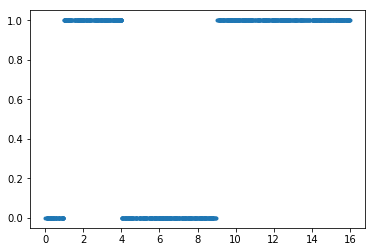

In [4]:
import matplotlib.pyplot as plt
plt.plot(X, Y, '.')

## Q2 - tri

Trier les points selon les $X$.

In [5]:
nuage = [(x,y) for x,y in zip(X,Y)]
nuage.sort()
nuage[:5]

[(0.004580711889554223, 0),
 (0.06850703882704323, 0),
 (0.07932882957939036, 0),
 (0.09219590570021907, 0),
 (0.09738384441795134, 0)]

## Q3 - moyenne

On suppose que les $Y$ sont triés selon les $X$ croissants.
Calculer la moyenne des différences entre $Y$ et la moyenne $m$ des $Y$
(en valeur absolue) sur un intervalle $[i,j]$, $j$ exclu.
Ecrire une fonction ``def somme_diff(nuage, i, j)`` qui exécute ce calcul
qui correspond à $\sum_{k=i}^{j-1} |Y_k - m|$ avec $m = (\sum_{k=i}^{j-1} Y_k) / (j-i)$.

In [6]:
def somme_diff(xy, i, j):
    m = sum(e[1] for e in xy[i:j]) / (j-i)
    return sum(abs(e[1]-m) for e in xy[i:j])

somme_diff(nuage, 0, 5), somme_diff(nuage, 0, len(nuage))

(0.0, 453.79200000000236)

## Q4 - distance

Soit $i,j$ deux entiers, on coupe l'intervalle en deux : $i,k$ et $k,j$. On calcule la ``somme_diff`` sur ces deux intervalles, on fait la somme des différences (en valeurs absolues) de ces moyennes par rapport à la valeur sur le plus grand intervalle. On écrit la fonction ``def difference(nuage, i, j, k):``.

In [7]:
def difference(nuage, i, j, k):
    m1 = somme_diff(nuage, i, k)
    m2 = somme_diff(nuage, k, j)
    m = somme_diff(nuage, i, j)
    return abs(m1+m2-m)

difference(nuage, 0, len(nuage), 100)

11.960888888903185

## Q5 - fonction comme paramètre

Le langage Python permet de passer une fonction à une autre fonction en tant qu'argument. Un exemple :

In [8]:
def fct(x, y):
    return abs(x-y)

def distance_list(list_x, list_y, f):
    return sum(f(x,y) for x,y in zip(list_x, list_y))

distance_list([0, 1], [0, 2], fct)

1

Ecrire la fonction précédente en utilisant la fonction ``fct``.

In [9]:
def somme_diff(xy, i, j, f):
    m = sum(e[1] for e in xy[i:j]) / (j-i)
    # On a modifié les fonctions précédentes pour calculer
    # une fonction d'erreur "custom" ou définie par l'utilisateur.
    return sum(f(e[1], m) for e in xy[i:j])

def difference(nuage, i, j, k, f):
    m1 = somme_diff(nuage, i, k, f)
    m2 = somme_diff(nuage, k, j, f)
    m = somme_diff(nuage, i, j, f)
    return abs(m - m1) + abs(m - m2)

difference(nuage, 0, len(nuage), 100, fct)

465.75288888890555

## Q6 - optimiser

On veut déterminer le $i$ optimal, celui qui maximise la différence dans l'intervalle $[i,j]$. On souhaite garder la fonction ``fct`` comme argument. Pour cela, implémenter la fonction ``def optimise(nuage, i, j, f):``.

In [10]:
def optimise(nuage, i, j, f):
    mx = -1
    ib = None
    for k in range(i+1,j-1):
        d = difference(nuage, i,j,k, f)
        if ib is None or d > mx:
            mx = d
            ib = k
    if ib is None:
        # Au cas où l'intervalle est vide, on retourne une coupure
        # égale à i.
        ib = i
        mx = 0
    return ib, mx

optimise(nuage, 0, len(nuage), fct)

(552, 650.3666086956543)

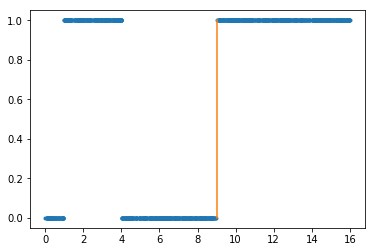

In [11]:
import matplotlib.pyplot as plt
x = nuage[552][0]
plt.plot(X,Y,'.')
plt.plot([x,x], [0,1])

Le premier point de coupure trouvé (le trait orange) correspond à un des bords d'un des escaliers.

## Q7 - optimisation encore

Recommencer sur les deux intervalles trouvés. La question était juste histoire que le résultat à la question précédente est reproductible sur d'autres intervalles.

In [12]:
optimise(nuage, 0, 68, fct), optimise(nuage, 68, len(nuage), fct)

((58, 34.11764705882355), (552, 566.5764551484369))

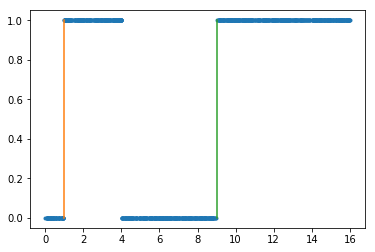

In [13]:
import matplotlib.pyplot as plt
x = nuage[58][0]
x2 = nuage[552][0]
plt.plot(X,Y,'.')
plt.plot([x,x], [0,1])
plt.plot([x2,x2], [0,1])

## Q8 - fonction récursive

Pouvez-vous imaginer une fonction récursive qui produit toutes les séparations. Ecrire la fonction ``def recursive(nuage, i, j, f, th=0.1):``.

In [14]:
def recursive(nuage, i, j, f, th=0.1):
    k, mx = optimise(nuage, i, j, f)
    if mx <= th:
        return None
    r1 = recursive(nuage, i, k, f, th=th)
    r2 = recursive(nuage, k, j, f, th=th)
    if r1 is None and r2 is None:
        return [k]
    elif r1 is None:
        return [k] + r2
    elif r2 is None:
        return r1 + [k]
    else:
        return r1 + [k] + r2
    
r = recursive(nuage, 0, len(nuage), fct)
r

[58, 262, 552]

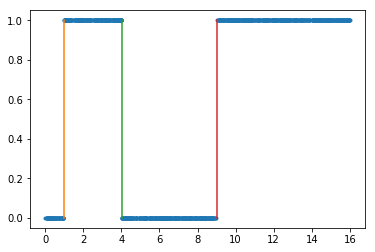

In [15]:
import matplotlib.pyplot as plt
plt.plot(X, Y, '.')
for i in r:
    x = nuage[i][0]
    plt.plot([x,x], [0,1])

## Q9 - coût

Quel est le coût de la fonction ``optimize`` en fonction de la taille de l'intervalle ? Peut-on mieux faire  (ce qu'on n'implémentera pas).

Tel qu'il est implémenté, le coût est en $O(n^2)$, le coût peut être linéaire en triant les éléments dans l'ordre croissant, ce qui a été fait, ou $n\ln n$ si on inclut le coût du tri bien qu'on ne le fasse qu'une fois. Voyons plus en détail comment se débarrasser du coût en $O(n^2)$. Tout d'abord la version actuelle.

In [16]:
def somme_diff_abs(xy, i, j):
    m = sum(e[1] for e in xy[i:j]) / (j-i)
    return sum(abs(e[1]-m) for e in xy[i:j])

def difference_abs(nuage, i, j, k):
    m1 = somme_diff_abs(nuage, i, k)
    m2 = somme_diff_abs(nuage, k, j)
    m = somme_diff_abs(nuage, i, j)
    return abs(m1+m2-m)

def optimise_abs(nuage, i, j):
    mx = -1
    ib = None
    for k in range(i+1,j-1):
        d = difference_abs(nuage, i,j,k)
        if ib is None or d > mx:
            mx = d
            ib = k
    if ib is None:
        ib = i
        mx = 0
    return ib, mx

%timeit optimise_abs(nuage, 0, len(nuage))

492 ms ± 57.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


L'instruction suivante permet de voir où le programme passe la majeure partie de son temps.

In [17]:
# %prun optimise_abs(nuage, 0, len(nuage))

La fonction [sum](https://docs.python.org/3/library/functions.html#sum) cache une boucle, avec la boucle ``for`` dans la fonction ``optimise``, cela explique le coût en $O(n^2)$. Le fait qu'à chaque itération, on passe une observation d'un côté à l'autre de la coupure puis on recalcule les moyennes... Il y a deux façons d'optimiser ce calcul selon qu'on tient compte du fait que les valeurs de $Y$ sont binaires ou non.

Dans le premier cas, il suffit de compter les valeurs 0 ou 1 de part et d'autres de la coupure (histogrammes) pour calculer la moyenne. Lorsque $k$ varie, il suffit de mettre à jour les histogrammes en déduisant et en ajoutant le $Y_k$ aux bons endroits.

In [18]:
def histogramme_y(xy, i, j):
    d = [0, 0]
    for x, y in xy[i:j]:
        d[y] += 1
    return d

def somme_diff_histogramme(d):
    m = d[1] * 1.0 / (d[0] + d[1])
    return (1-m) * d[1] + m * d[0]

def optimise_rapide(nuage, i, j):
    # On calcule les histogrammes.
    d1 = histogramme_y(nuage, i, i+1)
    d2 = histogramme_y(nuage, i+1, j)
    d = d1.copy()
    d[0] += d2[0]
    d[1] += d2[1]
    
    m = somme_diff_histogramme(d)
    m1 = somme_diff_histogramme(d1)
    m2 = somme_diff_histogramme(d2)
    mx = -1
    ib = None
    for k in range(i+1,j-1):
        d = abs(m1+m2-m)
        if ib is None or d > mx:
            mx = d
            ib = k
        # On met à jour les histogrammes. On ajoute d'un côté, on retranche de l'autre.
        y = nuage[k][1] 
        d1[y] += 1
        d2[y] -= 1
        m1 = somme_diff_histogramme(d1)
        m2 = somme_diff_histogramme(d2)
    if ib is None:
        ib = i
        mx = 0
    return ib, mx

# On vérifie qu'on obtient les mêmes résultats.
optimise_rapide(nuage, 0, len(nuage)), optimise_abs(nuage, 0, len(nuage))

((552, 196.57460869565222), (552, 196.574608695652))

C'est carrément plus rapide et cela marche pour toute fonction ``fct``.

In [19]:
%timeit optimise_rapide(nuage, 0, len(nuage))

1.31 ms ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Si on ne suppose pas que les $Y_i$ sont binaires et qu'ils sont quelconques, les histogrammes contiendront plus de deux éléments. Dans ce cas, il faut conserver deux tableaux triés des $Y_i$, de part et d'autres de la coupure. Lorsqu'on bouge la coupure $k$, cela revient à déplacer $Y_k$ d'un tableau à l'autre ce qui se fera par recherche dichotomique donc en $O(\ln n)$. La mise à jour de la moyenne des valeurs absolues est immédiate si la fonction ``fct=abs(x-y)`` et pas forcément immédiate dans le cas général. Lorsque c'est une valeur absolue, il faut utiliser quelques résultats sur la [régression quantile](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/td_note_2017_2.html?highlight=mediane).

## Q10 - autre nuage de points

Comment l'algorithme se comporte-t-il lorsque tous les points sont distincts ?

In [20]:
import random
X2 = list(range(10))
Y2 = X2

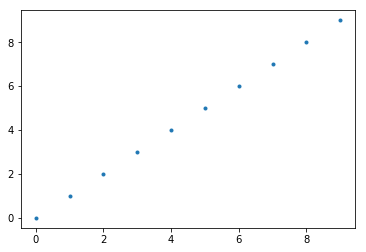

In [21]:
import matplotlib.pyplot as plt
plt.plot(X2,Y2,'.')

In [22]:
nuage2 = [(x,y) for x,y in zip(X2,Y2)]
nuage2.sort()

In [23]:
r = recursive(nuage2, 0, len(nuage2), fct)
len(r), r

(5, [2, 3, 5, 7, 8])

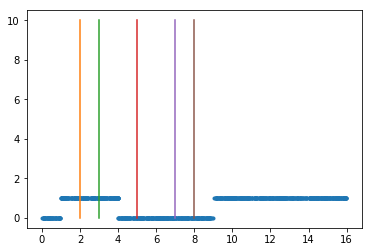

In [24]:
import matplotlib.pyplot as plt
plt.plot(X,Y,'.')
for i in r:
    x = nuage2[i][0]
    plt.plot([x,x], [0,10])

La fonction va placer un point dans chaque intervalle, il y aura quasiment autant de points de coupures que de points. Presque autant car l'implémentation a quelques effets de bords comme la boucle ``for k in range(i+1,j-1):`` qui ne considère pas les extrémités d'un intervalle comme de potentiels points de coupures.